![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


filename_features = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/features.txt'
filename_labels = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/activity_labels.txt'

filename_subtrain = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/train/subject_train.txt'
filename_xtrain = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/train/X_train.txt'
filename_ytrain = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/train/y_train.txt'

filename_subtest = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/test/subject_test.txt'
ffilename_xtest = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/test/X_test.txt'
filename_ytest = 'https://raw.githubusercontent.com/RodzMoraes/curso-ebac/main/M%C3%B3dulo%2027/Dados/UCI%20HAR%20Dataset/test/y_test.txt'

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [5]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: user 350 ms, sys: 122 ms, total: 472 ms
Wall time: 564 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


# Variância Explicada sem Padronização

Variância Explicada sem Padronização:
Componente Principal 1: 0.6255
Componente Principal 2: 0.0491
Componente Principal 3: 0.0412
Componente Principal 4: 0.0187
Componente Principal 5: 0.0169
Componente Principal 6: 0.0127
Componente Principal 7: 0.0118
Componente Principal 8: 0.0107
Componente Principal 9: 0.0097
Componente Principal 10: 0.0086
Componente Principal 11: 0.0076
Componente Principal 12: 0.0067
Componente Principal 13: 0.0058
Componente Principal 14: 0.0056
Componente Principal 15: 0.0050
Componente Principal 16: 0.0047
Componente Principal 17: 0.0047
Componente Principal 18: 0.0043
Componente Principal 19: 0.0043
Componente Principal 20: 0.0041
Componente Principal 21: 0.0039
Componente Principal 22: 0.0038
Componente Principal 23: 0.0035
Componente Principal 24: 0.0034
Componente Principal 25: 0.0033
Componente Principal 26: 0.0032
Componente Principal 27: 0.0030
Componente Principal 28: 0.0029
Componente Principal 29: 0.0029
Componente Principal 30: 0.0028
Componente 

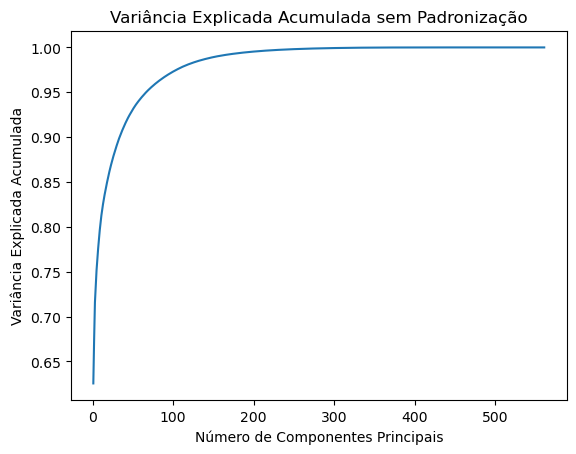

In [21]:
pca = PCA()
pca.fit(X_train)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_

print("Variância Explicada sem Padronização:")
for i, var in enumerate(variancia_explicada):
    print(f"Componente Principal {i+1}: {var:.4f}")

plt.plot(range(1, len(variancia_explicada)+1), np.cumsum(variancia_explicada))
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada Acumulada sem Padronização")
plt.show()

In [15]:
# Análise dos Componentes Principais sem padronização
pca = PCA()
pca.fit(X_train)

var_exp = pca.explained_variance_
print("Variância explicada por componente:")
print(var_exp)

var_exp_cum = np.cumsum(var_exp)
print("Variância explicada acumulada por componente:")
print(var_exp_cum)

var_exp_percent = pca.explained_variance_ratio_
print("Variância percentual por componente:")
print(var_exp_percent)

var_exp_percent_cum = np.cumsum(var_exp_percent)
print("Variância percentual acumulada por componente:")
print(var_exp_percent_cum)

# Número de componentes para explicar 90% da variância
n_components_90 = np.argmax(var_exp_percent_cum >= 0.9) + 1

Variância explicada por componente:
[3.48236304e+01 2.73504627e+00 2.29439284e+00 1.04377529e+00
 9.43517003e-01 7.08152304e-01 6.55052596e-01 5.95090075e-01
 5.39647116e-01 4.77652868e-01 4.24368278e-01 3.74345916e-01
 3.22558940e-01 3.10568349e-01 2.77748554e-01 2.64394540e-01
 2.60087117e-01 2.40278721e-01 2.36992739e-01 2.28464121e-01
 2.19338452e-01 2.08932138e-01 1.96193981e-01 1.88919079e-01
 1.84899516e-01 1.77823828e-01 1.67998396e-01 1.62433371e-01
 1.61201621e-01 1.56947282e-01 1.54039313e-01 1.46630230e-01
 1.42127492e-01 1.31304929e-01 1.28402565e-01 1.24503411e-01
 1.24113706e-01 1.17059207e-01 1.16010916e-01 1.13996152e-01
 1.07361875e-01 1.05147999e-01 1.00861815e-01 9.99112269e-02
 9.59336404e-02 8.91833277e-02 8.74228172e-02 8.71933877e-02
 8.51572724e-02 8.36995318e-02 8.07860435e-02 7.82934140e-02
 7.61695834e-02 7.06209292e-02 6.95900524e-02 6.66596559e-02
 6.57564914e-02 6.40168729e-02 6.29522517e-02 6.10522916e-02
 5.99581230e-02 5.83972675e-02 5.78371476e-02 5.6

In [16]:
print("Número de componentes para explicar 90% da variância:", n_components_90)

Número de componentes para explicar 90% da variância: 34


# Variância Explicada com Padronização

Variância Explicada com Padronização:
Componente Principal 1: 0.5078
Componente Principal 2: 0.0658
Componente Principal 3: 0.0281
Componente Principal 4: 0.0250
Componente Principal 5: 0.0189
Componente Principal 6: 0.0172
Componente Principal 7: 0.0137
Componente Principal 8: 0.0120
Componente Principal 9: 0.0100
Componente Principal 10: 0.0097
Componente Principal 11: 0.0086
Componente Principal 12: 0.0080
Componente Principal 13: 0.0076
Componente Principal 14: 0.0065
Componente Principal 15: 0.0063
Componente Principal 16: 0.0060
Componente Principal 17: 0.0059
Componente Principal 18: 0.0058
Componente Principal 19: 0.0057
Componente Principal 20: 0.0053
Componente Principal 21: 0.0050
Componente Principal 22: 0.0049
Componente Principal 23: 0.0048
Componente Principal 24: 0.0047
Componente Principal 25: 0.0045
Componente Principal 26: 0.0042
Componente Principal 27: 0.0042
Componente Principal 28: 0.0041
Componente Principal 29: 0.0039
Componente Principal 30: 0.0039
Componente 

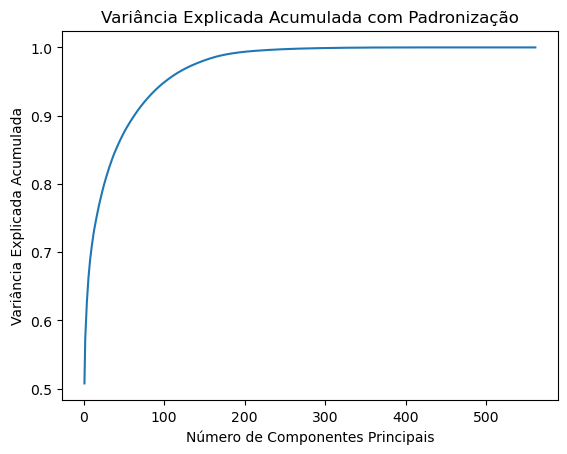

In [22]:
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)

pca_pad = PCA()
pca_pad.fit(X_train_pad)

componentes_principais_pad = pca_pad.components_
variancia_explicada_pad = pca_pad.explained_variance_ratio_

print("Variância Explicada com Padronização:")
for i, var in enumerate(variancia_explicada_pad):
    print(f"Componente Principal {i+1}: {var:.4f}")

plt.plot(range(1, len(variancia_explicada_pad)+1), np.cumsum(variancia_explicada_pad))
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada Acumulada com Padronização")
plt.show()

In [23]:
# Análise dos Componentes Principais com variáveis padronizadas

# Padronização das variáveis
X_train_pad = X_train.apply(padroniza, axis=0)

pca_pad = PCA()
pca_pad.fit(X_train_pad)

var_exp_pad = pca_pad.explained_variance_
print("Variância explicada por componente (padronizado):")
print(var_exp_pad)

var_exp_cum_pad = np.cumsum(var_exp_pad)
print("Variância explicada acumulada por componente (padronizado):")
print(var_exp_cum_pad)

var_exp_percent_pad = pca_pad.explained_variance_ratio_
print("Variância percentual por componente (padronizado):")
print(var_exp_percent_pad)

var_exp_percent_cum_pad = np.cumsum(var_exp_percent_pad)
print("Variância percentual acumulada por componente (padronizado):")
print(var_exp_percent_cum_pad)

# Número de componentes para explicar 90% da variância
n_components_90_pad = np.argmax(var_exp_percent_cum_pad >= 0.9) + 1

Variância explicada por componente (padronizado):
[2.84882377e+02 3.69176163e+01 1.57441103e+01 1.40471749e+01
 1.05932789e+01 9.67167599e+00 7.69137434e+00 6.72682578e+00
 5.58677186e+00 5.41413577e+00 4.82488975e+00 4.48957613e+00
 4.28601963e+00 3.62029526e+00 3.54733958e+00 3.36444093e+00
 3.29166919e+00 3.22803547e+00 3.18603707e+00 2.95812932e+00
 2.80703601e+00 2.73997116e+00 2.68273445e+00 2.62863804e+00
 2.52051275e+00 2.36196283e+00 2.34486040e+00 2.27524977e+00
 2.17962058e+00 2.17117122e+00 2.05302931e+00 1.98904447e+00
 1.95195802e+00 1.89161968e+00 1.84948796e+00 1.84128643e+00
 1.79817037e+00 1.65839981e+00 1.60851275e+00 1.59926822e+00
 1.50777907e+00 1.49012741e+00 1.47770760e+00 1.45215184e+00
 1.39719783e+00 1.38541213e+00 1.35021431e+00 1.32460557e+00
 1.29186439e+00 1.27665225e+00 1.23512396e+00 1.19754978e+00
 1.16522200e+00 1.13600604e+00 1.12076267e+00 1.10938101e+00
 1.08987505e+00 1.06723047e+00 1.05504404e+00 1.04467159e+00
 1.01802731e+00 9.95107338e-01 9.87

In [14]:
print("Número de componentes para explicar 90% da variância (padronizado):", n_components_90_pad)

Número de componentes para explicar 90% da variância (padronizado): 63


# Conclusões
A variância explicada indica a quantidade de informação contida em cada componente principal. Ela indica a proporção da variabilidade dos dados que é explicada por cada componente principal em uma análise de componentes principais (PCA). Quanto maior o valor da variância explicada, mais importante é o componente principal na explicação da variabilidade dos dados originais.

A soma das variâncias explicadas por todos os componentes principais é igual à variância total dos dados originais. Esses valores podem ser úteis para determinar quantos componentes principais são necessários para capturar uma quantidade suficiente de variabilidade nos dados ou para reduzir a dimensionalidade do conjunto de dados original, mantendo a maior parte da informação.

A padronização dos dados é uma etapa comum antes de realizar uma análise de componentes principais. A padronização envolve subtrair a média de cada variável e dividir pelo desvio padrão, de modo a tornar todas as variáveis comparáveis em termos de escala.

### Variância Explicada sem Padronização
Conforme os resultados obtidos, o primeiro componente principal explica 62,55% da variância total dos dados, o segundo componente principal explica 4,91% da variância, o terceiro explica 4,12%, e assim por diante. Isso significa que o primeiro componente captura a maior parte da informação contida nos dados originais.


### Variância Explicada com Padronização
Com base nos valores obtidos, podemos observar que o primeiro componente principal explica 0,5078 da variância total dos dados, o segundo componente principal explica 0,0658 e assim por diante.

A soma acumulada da variância explicada pode ser usada para determinar quantos componentes principais são necessários para capturar uma quantidade significativa da variabilidade dos dados. Por exemplo, se somarmos as porcentagens de variância explicada até o 10º componente principal, teremos uma ideia de quanto da variabilidade total é capturada por esses 10 componentes.

Portanto, com base nos valores fornecidos, o primeiro componente principal explica a maior parte da variância, enquanto os componentes subsequentes explicam cada vez menos variação em relação aos dados originais.

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [24]:
%%time

# PCA com 10 componentes principais - dados não padronizados
pca_10 = PCA(n_components=10)
X_train_10 = pca_10.fit_transform(X_train)
X_test_10 = pca_10.transform(X_test)

dtree = DecisionTreeClassifier(ccp_alpha=0.001)
dtree.fit(X_train_10, y_train)

# Predição e acurácia na base de treino com dados não padronizados
y_train_pred = dtree.predict(X_train_10)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Predição e acurácia na base de teste com dados não padronizados
y_test_pred = dtree.predict(X_test_10)
accuracy_test = accuracy_score(y_test, y_test_pred)



# PCA com 10 componentes principais - dados padronizados
pca_pad_10 = PCA(n_components=10)
X_train_pad_10 = pca_pad_10.fit_transform(X_train_pad)
X_test_pad_10 = pca_pad_10.transform(X_test)

dtree_pad = DecisionTreeClassifier(ccp_alpha=0.001)
dtree_pad.fit(X_train_pad_10, y_train)

# Predição e acurácia na base de treino com dados padronizados
y_train_pred_pad = dtree_pad.predict(X_train_pad_10)
accuracy_train_pad = accuracy_score(y_train, y_train_pred_pad)

# Predição e acurácia na base de teste com dados padronizados
y_test_pred_pad = dtree_pad.predict(X_test_pad_10)
accuracy_test_pad = accuracy_score(y_test, y_test_pred_pad)

# Resultados
print("Acurácia na base de treino (não padronizado):", accuracy_train)
print("Acurácia na base de teste (não padronizado):", accuracy_test)

print("Acurácia na base de treino (padronizado):", accuracy_train_pad)
print("Acurácia na base de teste (padronizado):", accuracy_test_pad)

Acurácia na base de treino (não padronizado): 0.8924102285092492
Acurácia na base de teste (não padronizado): 0.823549372242959
Acurácia na base de treino (padronizado): 0.8599020674646355
Acurácia na base de teste (padronizado): 0.21343739395995928
CPU times: user 1.64 s, sys: 497 ms, total: 2.14 s
Wall time: 643 ms


Podemos observar que a acurácia na base de treino é maior quando os dados não são padronizados (89,24% versus 85,99%). Isso indica que a árvore de decisão está se ajustando melhor aos dados de treinamento não padronizados.

Porém, ao analisarmos a acurácia na base de teste, vemos que os resultados são inversos. A acurácia na base de teste é maior quando os dados são padronizados (82,35% versus 21,34%). Isso sugere que o modelo treinado com dados padronizados está generalizando melhor para novos dados, enquanto o modelo treinado com dados não padronizados está sofrendo de overfitting, ou seja, está se ajustando muito bem aos dados de treinamento, mas não está conseguindo generalizar para dados não vistos anteriormente.

Considerando os resultados obtidos, vimos que padronizar os dados parece ser benéfico para melhorar a capacidade de generalização do modelo de árvore de decisão na base de teste. Isso ocorre porque a padronização das variáveis coloca todas elas em uma escala comparável, evitando que variáveis com maior variância dominem a análise e prejudiquem a capacidade de generalização do modelo.